# Predicting Chronic Kidney Disease Project:

This kidney disease machine learning project is aimed at predicting a risk of getting CKD. CKD is a prevalent and serious health condition. There are about 37 million people in the United States who have Chronic Kidney Disease (CKD). 


### By Andrea Hobby 

### BlackInDataWeek23


# Import Libraries

In [354]:
import pandas as pd 
import os
import numpy as np
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import streamlit as st 
import pickle
%matplotlib inline

## Read in Data

In [355]:
# change the current directory
# to specified directory
os.chdir(r"C:\Users\andre\Documents\Kidney Project")


In [356]:
# Read in datasets from my directory
df = pd.read_csv('casedata.csv')

## Inspect data

In [357]:
df.head()

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [359]:
#checking for missing values
df.isnull().sum()

ID                     0
Age                    0
Female                 0
Racegrp                0
Educ                  20
Unmarried            452
Income              1166
CareSource             0
Insured              113
Weight               194
Height               191
BMI                  290
Obese                290
Waist                314
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
PoorVision           567
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

In [360]:
df.describe()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8819.000000,8799.000000,8367.000000,7653.000000,8706.000000,8625.000000,8628.000000,8529.000000,...,8739.000000,8819.000000,8817.000000,8819.000000,8808.000000,8796.000000,8400.000000,8783.00000,8813.000000,6000.000000
mean,4410.000000,49.358204,0.527271,0.431413,0.368591,0.417222,0.804503,79.094342,167.026854,28.294348,...,0.401419,0.233246,0.111376,0.311713,0.031449,0.066394,0.343214,0.02892,0.020424,0.077333
std,2545.970345,18.828726,0.499284,0.495302,0.482452,0.493132,0.396606,19.410707,10.099770,6.186076,...,0.490213,0.422922,0.314615,0.463220,0.174537,0.248983,0.474811,0.16759,0.141455,0.267142
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.600000,130.400000,12.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2205.500000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.400000,159.675000,24.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4410.000000,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,76.700000,166.600000,27.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6614.500000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.500000,174.200000,31.360000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,8819.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [361]:
#check for class imbalance in target variable
class_counts = df['CKD'].value_counts()


print(class_counts)

0.0    5536
1.0     464
Name: CKD, dtype: int64


<AxesSubplot:>

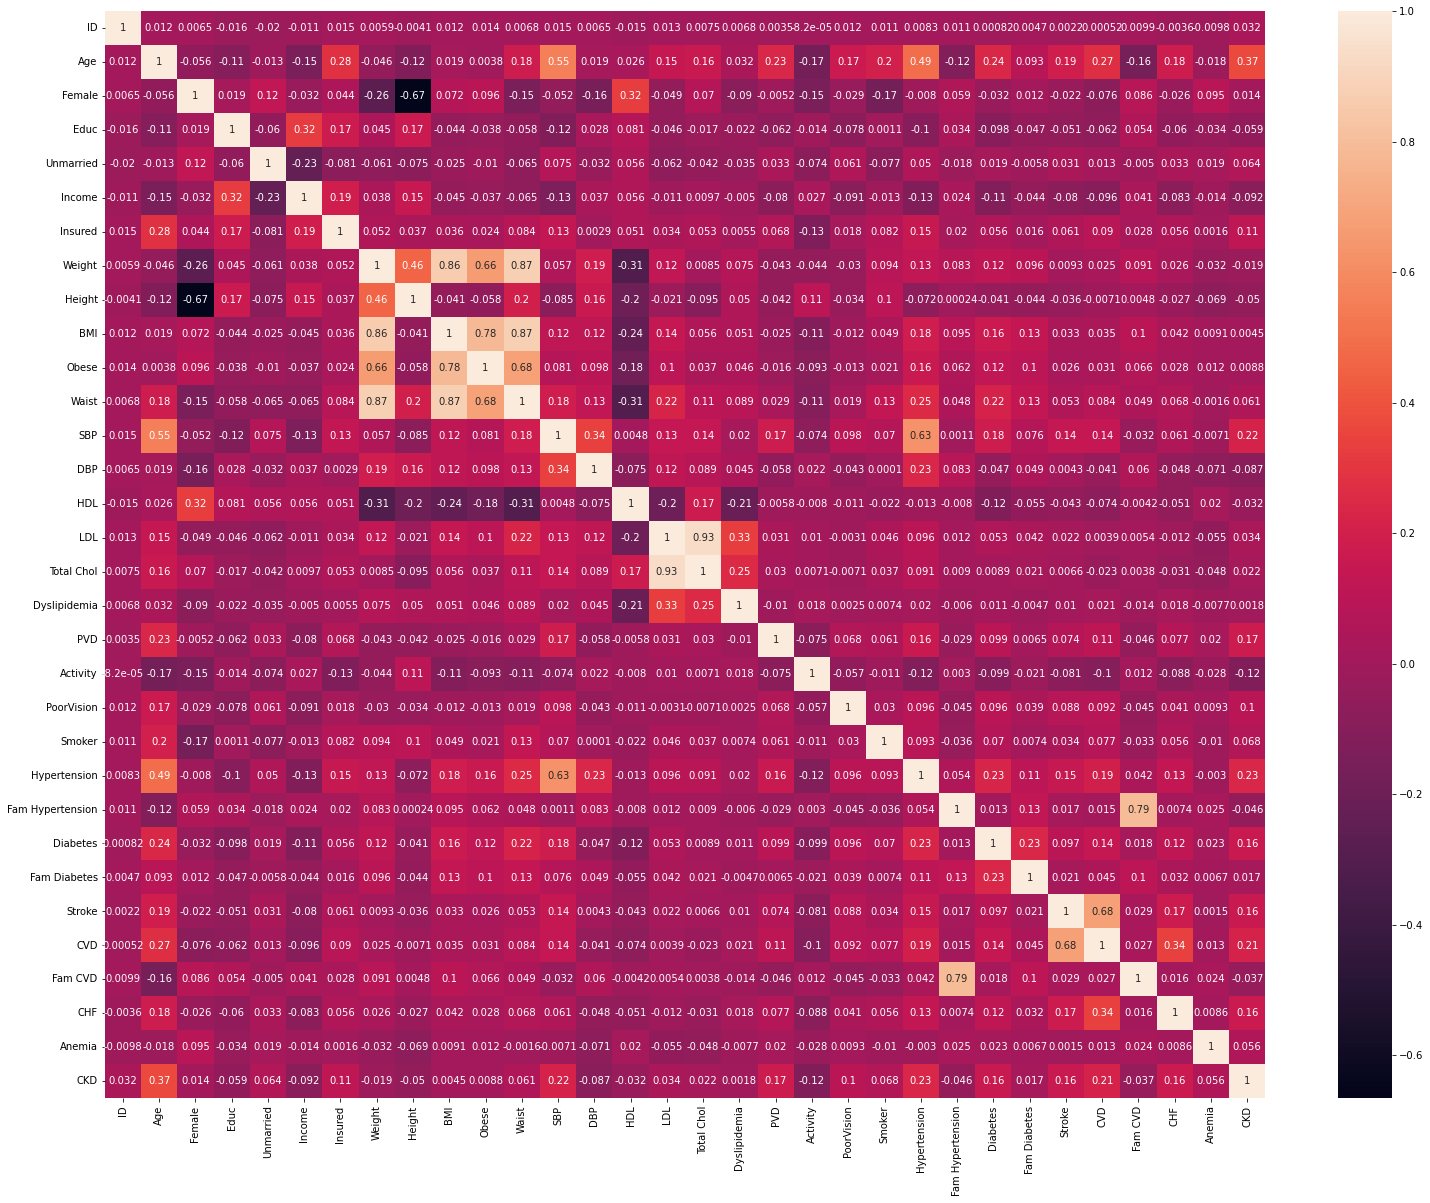

In [362]:
# Let's see the correlation matrix 
plt.figure(figsize = (26,20))     # Size of the figure
sns.heatmap(df.corr(),annot = True)

## Data Processing  and Feature Selection 

In [363]:
# Drop irrelevant or redudant columns 
df_drop = df.drop(['ID', 'Weight', 'Height', 'Obese', 'Waist'], axis=1)



In [364]:

# Define the age bins
bins = [18, 35, 50, 65, 85]

# Define the bin labels
labels = ['18-34', '35-49', '50-64', '65 and older']

# Convert the age variable into a categorical variable
df_drop['age_group'] = pd.cut(df_drop['Age'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)


      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Fam Hyper

In [365]:
bins = [0, 25, 30, 100]

# Define the bin labels
labels = ['Normal', 'Overweight', 'Obese']

# Convert the BMI variable into a categorical variable
df_drop['BMI_group'] = pd.cut(df_drop['BMI'], bins=bins, labels=labels)

# View the resulting DataFrame
print(df_drop)

      Age  Female Racegrp  Educ  Unmarried  Income CareSource  Insured    BMI  \
0      65       1   white   0.0        0.0     1.0      other      1.0  21.31   
1      36       1   hispa   0.0        NaN     1.0    noplace      0.0  22.88   
2      66       1   white   0.0        1.0     0.0    noplace      1.0  31.77   
3      54       1   white   1.0        0.0     0.0      DrHMO      1.0  26.94   
4      63       1   black   0.0        0.0     NaN     clinic      1.0  28.84   
...   ...     ...     ...   ...        ...     ...        ...      ...    ...   
8814   32       1   white   1.0        0.0     1.0      DrHMO      1.0  28.28   
8815   77       1   white   0.0        1.0     0.0     clinic      1.0  26.70   
8816   56       1   white   0.0        0.0     NaN      DrHMO      1.0  18.62   
8817   25       1   black   0.0        1.0     NaN     clinic      0.0  33.52   
8818   60       0   black   0.0        1.0     0.0    noplace      1.0  26.44   

        SBP  ...  Diabetes 

In [366]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               8819 non-null   int64   
 1   Female            8819 non-null   int64   
 2   Racegrp           8819 non-null   object  
 3   Educ              8799 non-null   float64 
 4   Unmarried         8367 non-null   float64 
 5   Income            7653 non-null   float64 
 6   CareSource        8819 non-null   object  
 7   Insured           8706 non-null   float64 
 8   BMI               8529 non-null   float64 
 9   SBP               8511 non-null   float64 
 10  DBP               8439 non-null   float64 
 11  HDL               8802 non-null   float64 
 12  LDL               8801 non-null   float64 
 13  Total Chol        8803 non-null   float64 
 14  Dyslipidemia      8819 non-null   int64   
 15  PVD               8819 non-null   int64   
 16  Activity          8809 n

In [367]:
# one hot encoding 
# Identify categorical variables
# Select categorical variables
cat_vars = df_drop.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical variables
print(cat_vars)

['Racegrp', 'CareSource']


In [368]:
# Apply one-hot encoding to categorical variables
df_dummies = pd.get_dummies(df_drop, columns=cat_vars)
print(df_dummies)

      Age  Female  Educ  Unmarried  Income  Insured    BMI    SBP   DBP   HDL  \
0      65       1   0.0        0.0     1.0      1.0  21.31  135.0  71.0  48.0   
1      36       1   0.0        NaN     1.0      0.0  22.88   96.0  52.0  31.0   
2      66       1   0.0        1.0     0.0      1.0  31.77  115.0  57.0  44.0   
3      54       1   1.0        0.0     0.0      1.0  26.94  110.0  57.0  74.0   
4      63       1   0.0        0.0     NaN      1.0  28.84  132.0  73.0  67.0   
...   ...     ...   ...        ...     ...      ...    ...    ...   ...   ...   
8814   32       1   1.0        0.0     1.0      1.0  28.28    NaN   NaN  53.0   
8815   77       1   0.0        1.0     0.0      1.0  26.70  157.0  44.0  87.0   
8816   56       1   0.0        0.0     NaN      1.0  18.62  126.0  81.0  61.0   
8817   25       1   0.0        1.0     NaN      0.0  33.52    NaN   NaN  75.0   
8818   60       0   0.0        1.0     0.0      1.0  26.44  133.0  75.0  71.0   

      ...   BMI_group  Race

In [369]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 8819 non-null   int64   
 1   Female              8819 non-null   int64   
 2   Educ                8799 non-null   float64 
 3   Unmarried           8367 non-null   float64 
 4   Income              7653 non-null   float64 
 5   Insured             8706 non-null   float64 
 6   BMI                 8529 non-null   float64 
 7   SBP                 8511 non-null   float64 
 8   DBP                 8439 non-null   float64 
 9   HDL                 8802 non-null   float64 
 10  LDL                 8801 non-null   float64 
 11  Total Chol          8803 non-null   float64 
 12  Dyslipidemia        8819 non-null   int64   
 13  PVD                 8819 non-null   int64   
 14  Activity            8809 non-null   float64 
 15  PoorVision          8252 non-null   fl

In [370]:
uint82flt = df_dummies.select_dtypes(include=['uint8']).columns.tolist()

def convert_to_float(df, column_list):
    for col in column_list:
        df[col] = df[col].astype('float64')
    return df

new_df = convert_to_float(df_dummies, uint82flt)

In [371]:
def convert_to_float64(df, column_names):
    for column_name in column_names:
        df[column_name + '_flt'] = df[column_name].astype('category').cat.codes.astype('float64')
    return df

In [372]:
#category columns

new_df = convert_to_float64(new_df, ['age_group', 'BMI_group'])
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 8819 non-null   int64   
 1   Female              8819 non-null   int64   
 2   Educ                8799 non-null   float64 
 3   Unmarried           8367 non-null   float64 
 4   Income              7653 non-null   float64 
 5   Insured             8706 non-null   float64 
 6   BMI                 8529 non-null   float64 
 7   SBP                 8511 non-null   float64 
 8   DBP                 8439 non-null   float64 
 9   HDL                 8802 non-null   float64 
 10  LDL                 8801 non-null   float64 
 11  Total Chol          8803 non-null   float64 
 12  Dyslipidemia        8819 non-null   int64   
 13  PVD                 8819 non-null   int64   
 14  Activity            8809 non-null   float64 
 15  PoorVision          8252 non-null   fl

In [373]:
# Drop variables that have categories 
new_array = new_df.drop(['Age', 'BMI', 'age_group', 'BMI_group'], axis=1)





In [374]:
new_array.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Female              8819 non-null   int64  
 1   Educ                8799 non-null   float64
 2   Unmarried           8367 non-null   float64
 3   Income              7653 non-null   float64
 4   Insured             8706 non-null   float64
 5   SBP                 8511 non-null   float64
 6   DBP                 8439 non-null   float64
 7   HDL                 8802 non-null   float64
 8   LDL                 8801 non-null   float64
 9   Total Chol          8803 non-null   float64
 10  Dyslipidemia        8819 non-null   int64  
 11  PVD                 8819 non-null   int64  
 12  Activity            8809 non-null   float64
 13  PoorVision          8252 non-null   float64
 14  Smoker              8819 non-null   int64  
 15  Hypertension        8739 non-null   float64
 16  Fam Hy

<AxesSubplot:>

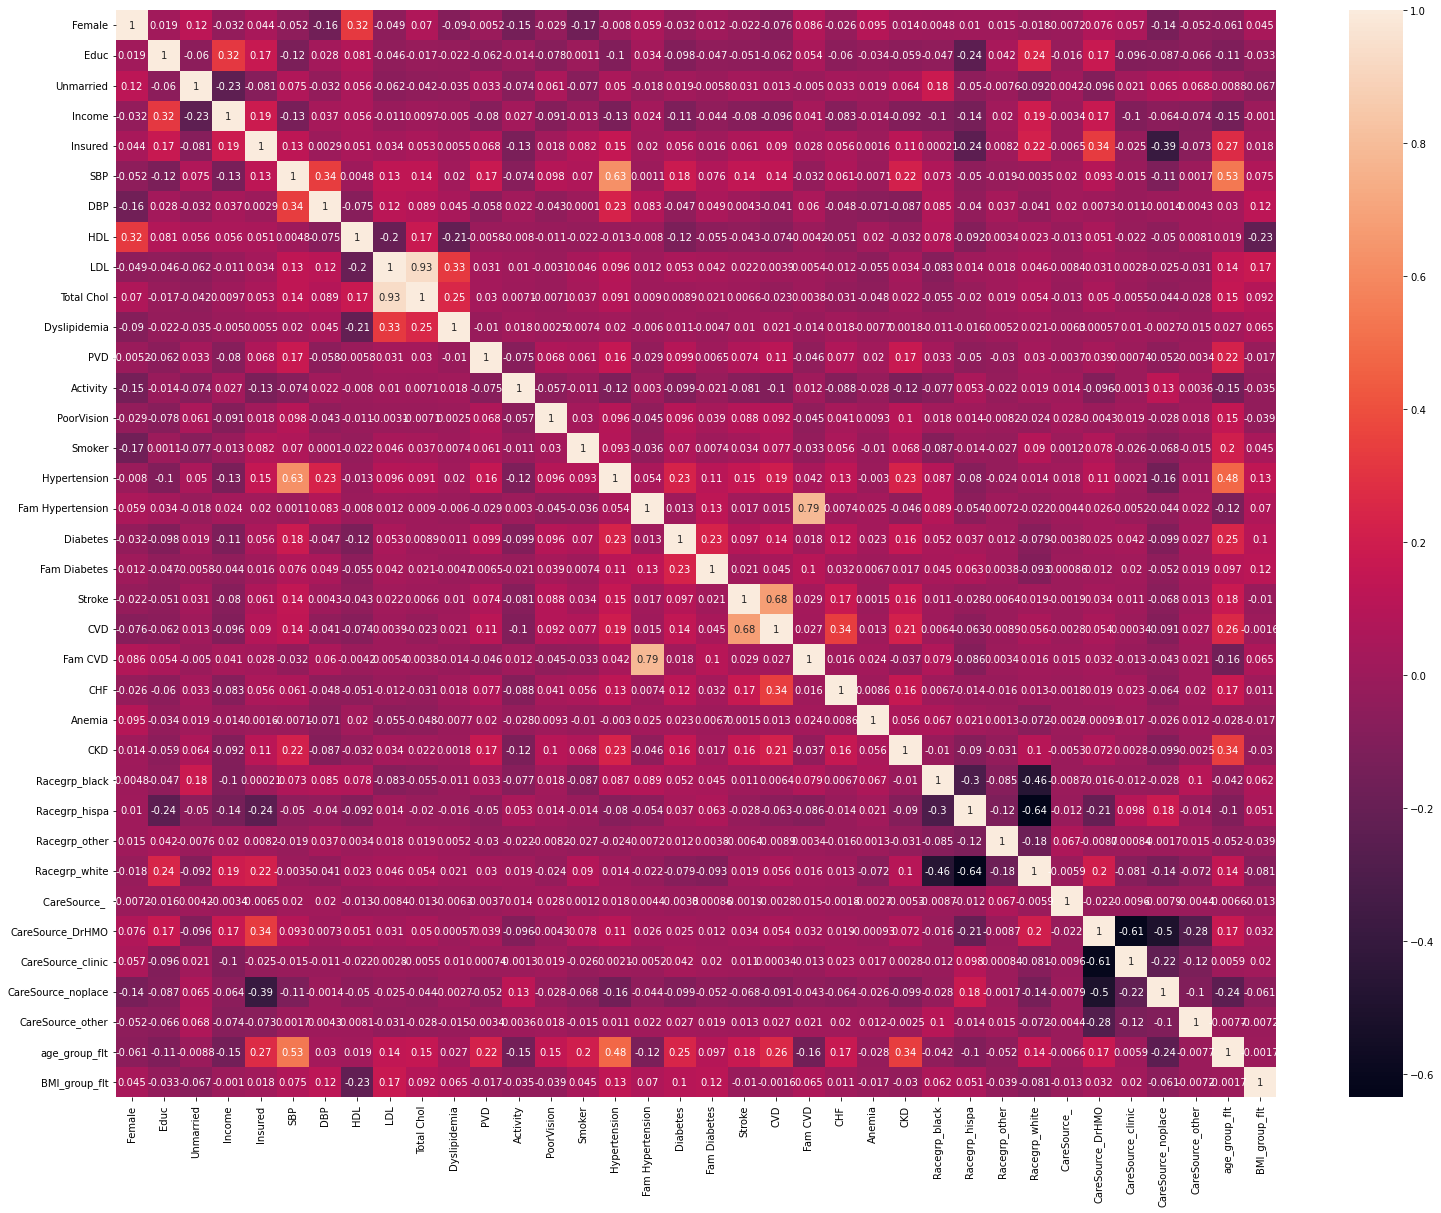

In [375]:
# Let's see the correlation matrix 
plt.figure(figsize = (26,20))     # Size of the figure
sns.heatmap(new_array.corr(),annot = True)

In [376]:
#This is giving a sum of null values 

def count_null_values(df):
    null_counts = df.isnull().sum()
    return null_counts

count_null_values(new_array)

Female                   0
Educ                    20
Unmarried              452
Income                1166
Insured                113
SBP                    308
DBP                    380
HDL                     17
LDL                     18
Total Chol              16
Dyslipidemia             0
PVD                      0
Activity                10
PoorVision             567
Smoker                   0
Hypertension            80
Fam Hypertension         0
Diabetes                 2
Fam Diabetes             0
Stroke                  11
CVD                     23
Fam CVD                419
CHF                     36
Anemia                   6
CKD                   2819
Racegrp_black            0
Racegrp_hispa            0
Racegrp_other            0
Racegrp_white            0
CareSource_              0
CareSource_DrHMO         0
CareSource_clinic        0
CareSource_noplace       0
CareSource_other         0
age_group_flt            0
BMI_group_flt            0
dtype: int64

In [377]:
# Drop rows with NaN in the target column
#missing target variable can cause errors during model training 
#because scikit-learn assumes that the target variable is complete and does not contain any missing values.

ckdarray = new_array.dropna(inplace=True)



In [378]:

#X = new_array.drop(['CKD'], axis=1)
#y = new_array['CKD']


def split_data(new_array):
    X = new_array.drop(['CKD'], axis=1)
    y = new_array['CKD']
    return X, y


In [379]:
X, y = split_data(new_array)

print(X)
print(y)

      Female  Educ  Unmarried  Income  Insured    SBP   DBP   HDL    LDL  \
0          1   0.0        0.0     1.0      1.0  135.0  71.0  48.0  249.0   
2          1   0.0        1.0     0.0      1.0  115.0  57.0  44.0  211.0   
3          1   1.0        0.0     0.0      1.0  110.0  57.0  74.0  156.0   
5          0   1.0        0.0     0.0      1.0  129.0  70.0  43.0  159.0   
6          0   1.0        0.0     0.0      0.0  137.0  92.0  41.0  143.0   
...      ...   ...        ...     ...      ...    ...   ...   ...    ...   
5995       0   0.0        0.0     0.0      1.0  149.0  77.0  33.0  189.0   
5996       0   0.0        0.0     1.0      1.0  130.0  75.0  38.0  123.0   
5997       0   1.0        1.0     0.0      1.0  126.0  83.0  40.0  131.0   
5998       0   0.0        1.0     0.0      1.0  129.0  50.0  58.0  134.0   
5999       1   1.0        0.0     1.0      1.0   95.0  59.0  52.0  102.0   

      Total Chol  ...  Racegrp_hispa  Racegrp_other  Racegrp_white  \
0          297.0 

In [380]:
#undersampling 
from imblearn.under_sampling import RandomUnderSampler

# X and y are your feature and target variables, respectively
rus = RandomUnderSampler(sampling_strategy=1/1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [381]:
X_resampled

,Female,Educ,Unmarried,Income,Insured,SBP,DBP,HDL,LDL,Total Chol,...,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other,age_group_flt,BMI_group_flt
0,1,1.0,0.0,1.0,1.0,132.0,62.0,75.0,139.0,214.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
1,1,1.0,0.0,0.0,1.0,119.0,85.0,55.0,104.0,159.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2,0,0.0,0.0,1.0,1.0,124.0,83.0,37.0,132.0,169.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
3,1,1.0,0.0,1.0,1.0,137.0,75.0,79.0,164.0,243.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
4,1,1.0,0.0,0.0,1.0,112.0,48.0,54.0,162.0,216.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1,0.0,1.0,0.0,1.0,172.0,94.0,57.0,153.0,210.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0
582,1,0.0,1.0,0.0,1.0,135.0,79.0,39.0,106.0,145.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
583,0,1.0,0.0,1.0,1.0,141.0,72.0,52.0,206.0,258.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
584,1,0.0,0.0,1.0,1.0,132.0,81.0,46.0,162.0,208.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [382]:
def split_data_and_train_test_split(new_array, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [383]:
X_train, X_test, y_train, y_test = split_data_and_train_test_split(new_array)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Female  Educ  Unmarried  Income  Insured    SBP   DBP    HDL    LDL  \
131       1   0.0        0.0     0.0      1.0  126.0  76.0   38.0  169.0   
153       1   1.0        1.0     0.0      1.0  118.0  86.0   46.0  214.0   
77        0   0.0        0.0     1.0      1.0  120.0  75.0   35.0  220.0   
437       1   0.0        0.0     0.0      1.0  181.0  82.0   47.0  165.0   
255       1   1.0        0.0     1.0      1.0  106.0  63.0  112.0  203.0   
..      ...   ...        ...     ...      ...    ...   ...    ...    ...   
71        1   0.0        1.0     0.0      1.0  100.0  51.0   48.0  123.0   
106       1   0.0        0.0     0.0      1.0  123.0  74.0   51.0  174.0   
270       1   0.0        1.0     0.0      1.0  100.0  55.0   52.0  140.0   
435       1   0.0        0.0     0.0      1.0  141.0  26.0   42.0  137.0   
102       1   1.0        0.0     1.0      1.0   93.0  65.0   42.0  189.0   

     Total Chol  ...  Racegrp_hispa  Racegrp_other  Racegrp_white  \
131       207.0  .

## Modeling

In [384]:
# Define the hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 30],
              'min_samples_split': [2, 3, 4, 5]}

# Define the decision tree classifier
# Instantiate the models
dtree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the decision tree model with the best hyperparameters
tree2 = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'])
tree2.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree2.predict(X_test)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


In [385]:
# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a GridSearchCV object to search over the hyperparameter grid
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the GridSearchCV object to the training data
grid_search_gbc.fit(X_train, y_train)

# extract the best estimator from the GridSearchCV object
best_gbc = grid_search.best_estimator_

# make predictions on the test set using the best estimator
y_pred = best_gbc.predict(X_test)

In [386]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_gbc.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [387]:
# Train the decision tree model with the best hyperparameters
bestgbcmodel = GradientBoostingClassifier(
                             max_depth=grid_search_gbc.best_params_['max_depth'],
                             min_samples_split=grid_search_gbc.best_params_['min_samples_split'],
                            n_estimators=grid_search_gbc.best_params_['n_estimators'], 
                            learning_rate=grid_search_gbc.best_params_['learning_rate'], 
                            min_samples_leaf=grid_search_gbc.best_params_['min_samples_leaf']
                                     )
bestgbcmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree2.predict(X_test)

In [388]:
# train the ensemble model
voting_clf = VotingClassifier(estimators=[('rf_model', rf_model), ('gbc', bestgbcmodel)], voting='soft')
voting_clf.fit(X_train, y_train)

# make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

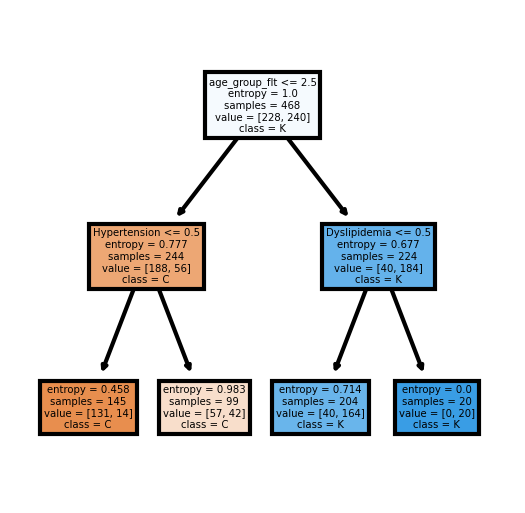

In [389]:
from sklearn import tree

# Get the feature names
column_names = X.columns.tolist()
 


# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

tree.plot_tree(tree2,
           feature_names = column_names, 
           class_names='CKD',
           filled = True);

# Save Plot
fig.savefig('decisiontree.png')

## Modeling Evaluation 

In [390]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_models(X_train, y_train, X_test, y_test, models):
    """
    Trains and evaluates the given models on the provided training and testing data.
    
    Parameters:
    X_train (pandas.DataFrame): Training features
    y_train (pandas.Series): Training labels
    X_test (pandas.DataFrame): Testing features
    y_test (pandas.Series): Testing labels
    models (list): List of models to evaluate
    
    Returns:
    dict: A dictionary of performance metrics for each model
    """
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        results[model_name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }
        
    return results



In [391]:
# Evaluate the models
models = {'Decision Tree': dtree_model, 'Random Forest': rf_model, 'Gradient Boosting': bestgbcmodel}
results = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
for model_name, model_results in results.items():
    print(f"{model_name} Performance:")
    for metric_name, metric_score in model_results.items():
        print(f"{metric_name}: {metric_score}")
    print("\n")

Decision Tree Performance:
Accuracy: 0.7033898305084746
Precision: 0.6551724137931034
Recall: 0.7169811320754716
F1 Score: 0.6846846846846846


Random Forest Performance:
Accuracy: 0.7711864406779662
Precision: 0.7321428571428571
Recall: 0.7735849056603774
F1 Score: 0.7522935779816513


Gradient Boosting Performance:
Accuracy: 0.8050847457627118
Precision: 0.7678571428571429
Recall: 0.8113207547169812
F1 Score: 0.7889908256880735




In [392]:
# Save the results to a file
with open('results_1to1.txt', 'w') as f:
    for model_name, model_results in results.items():
        f.write(f"{model_name} Performance:\n")
        for metric_name, metric_score in model_results.items():
            f.write(f"{metric_name}: {metric_score}\n")
        f.write("\n")

## Comments on Model Evaluation 

In this analysis, I implemented five distinct variations of the model, each with different sampling ratios between the target and nontarget groups. Specifically, I used the ratios 1:1, 1:2, 1:3, 1:4, and 1:5. Through evaluation, I determined that the version with a 1:1 sampling ratio yielded the most favorable F1 score.

### Decision Tree
The initial iteration of the model only utilized a decision tree algorithm. Despite several attempts to optimize the model with various hyperparameters, the resulting F1 score was unsatisfactory. Consequently, I incorporated Gradient Boosting and Random Forest algorithms. 

### Random Forest 
The inclusion of the Random Forest model in the analysis was motivated by the potential benefits of mitigating overfitting and improving the overall accuracy of the model. I hypothesized that this algorithm might outperform the decision tree in terms of F1 score, which was indeed observed in the results.

### Gradient Boosting Classifier 
Following a thorough evaluation of multiple models, the Gradient Boosting model demonstrated superior performance. I   decided to utilize this model in the development of the Streamlit Web application.







## Feature Importance

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# use the logistic regression model to select the most important features
model = SelectFromModel(log_reg, prefit=True)
selected_features = model.transform(scaled_features)

# get the names of the selected features
selected_feature_names = X_train.columns[model.get_support()]

# print the selected feature names and their coefficients
print("Selected Features:")
for feature, coef in zip(selected_feature_names, log_reg.coef_[0]):
    print(feature, ": ", coef)

Selected Features:
Income :  0.0948529597131689
Dyslipidemia :  -0.36535450322337193
PVD :  0.18546851115842505
PoorVision :  0.5872560648424812
Smoker :  0.31838051413112045
Hypertension :  -0.007990771798187087
Diabetes :  -0.011851400663483197
Stroke :  -0.011963548046581653
CVD :  0.004268417284866852
CHF :  -0.007695130761486
Anemia :  0.5911409134468067
Racegrp_black :  1.0161603005083197
Racegrp_other :  -0.1737533833123362
Racegrp_white :  0.4039063735640082
age_group_flt :  -0.5314132237401422


C:\Users\andre\Anaconda2021\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#save model
# pickling the model

print(os.getcwd())
with open('model.pkl', 'wb') as file:
    pickle.dump(bestgbcmodel, file)